In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from transparentai.datasets import load_adult
from transparentai import fairness
from transparentai.datasets import variable
from transparentai.models import classification
from transparentai.models import explainers

In [2]:
data = load_adult()
X, Y = data.drop(columns='income'), data['income']
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3]:
y_true       = Y_train
y_true_valid = Y_valid
y_pred       = clf.predict_proba(X_train)
y_pred_valid = clf.predict_proba(X_valid)

In [4]:
privileged_group = {'gender': ['Male']}

df_valid = data.loc[X_valid.index,:]
df_train = data.loc[X_train.index,:]

In [5]:
%matplotlib inline

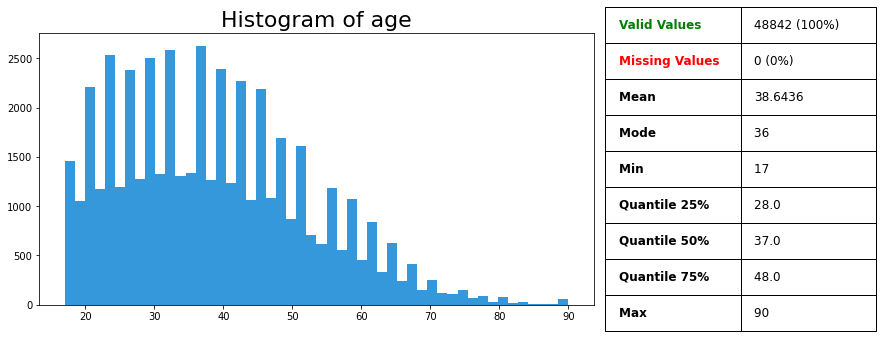

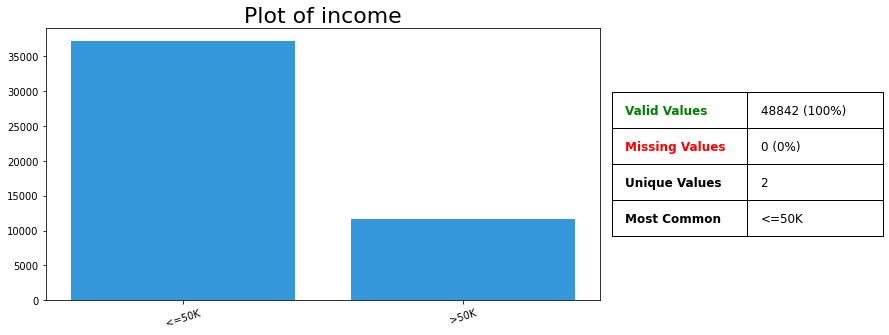

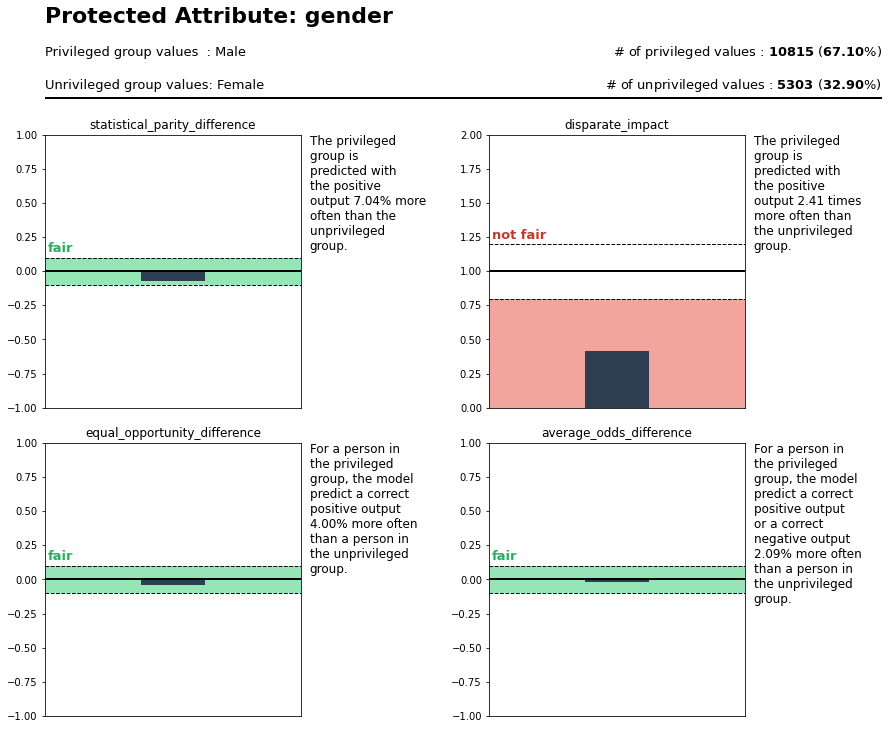

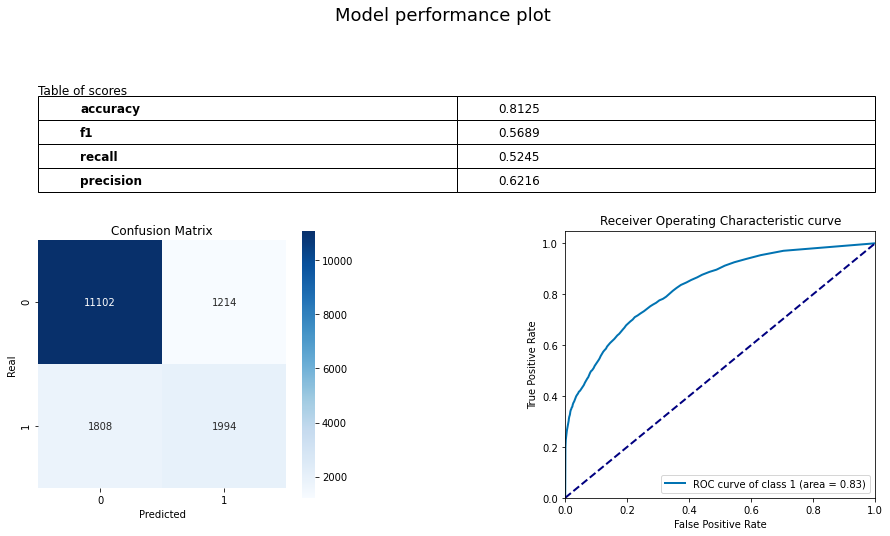

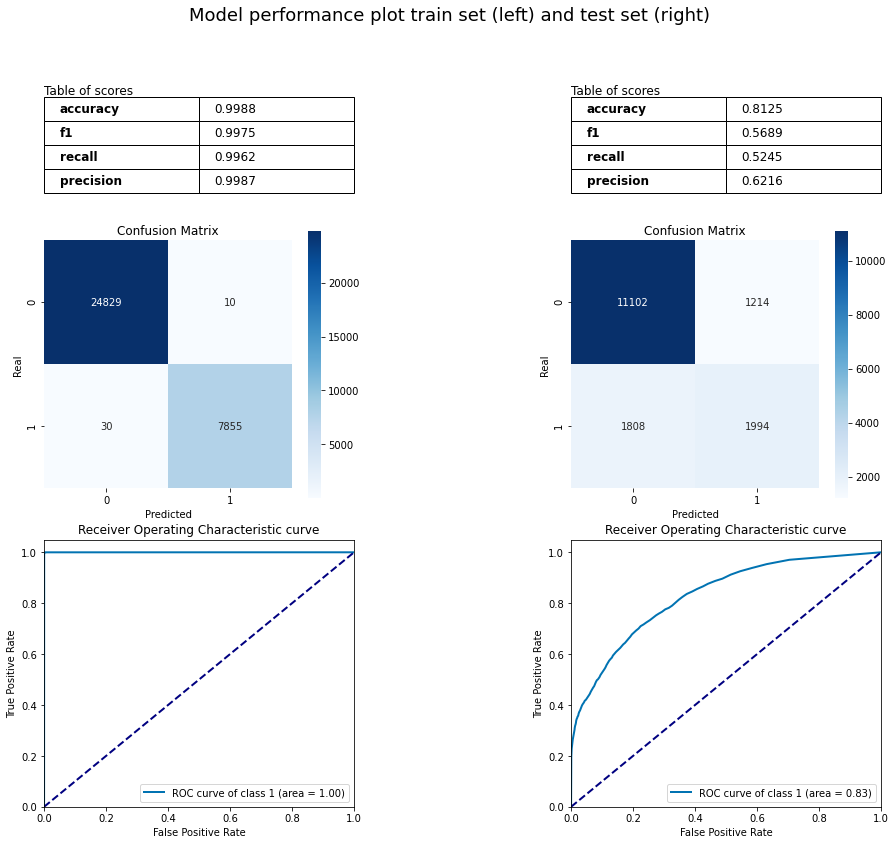

In [6]:
fig1 = variable.plot_variable(data['age'], plot=False)
fig2 = variable.plot_variable(data['income'], plot=False)
fig3 = fairness.plot_bias(y_true_valid, y_pred_valid, df_valid, privileged_group, plot=False)
fig4 = classification.plot_performance(y_true_valid, y_pred_valid, plot=False)
fig5 = classification.plot_performance(y_true, y_pred, y_true_valid, y_pred_valid, plot=False)

In [7]:
classification.plot_performance

<function transparentai.models.classification.classification_plots.plot_performance(y_true, y_pred, y_true_valid=None, y_pred_valid=None, metrics=None, **kwargs)>

In [8]:
figs = [fig1, fig2, fig3, fig4, fig5]

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('foo.pdf')
for f in figs:
    pp.savefig(f)
pp.close()

Generating y_true distribution
Generating model performance
Generating model feature influence


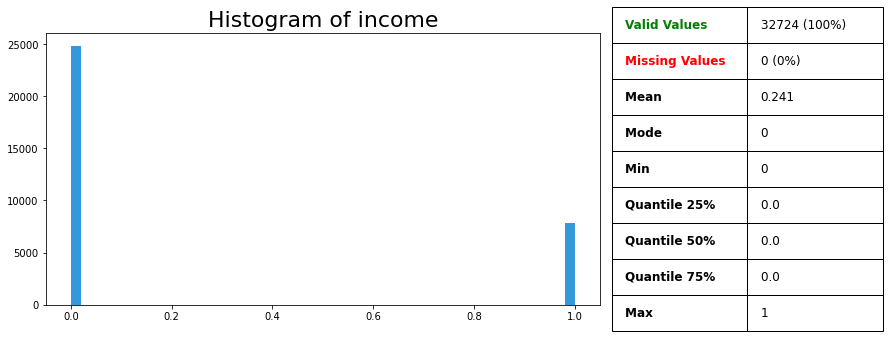

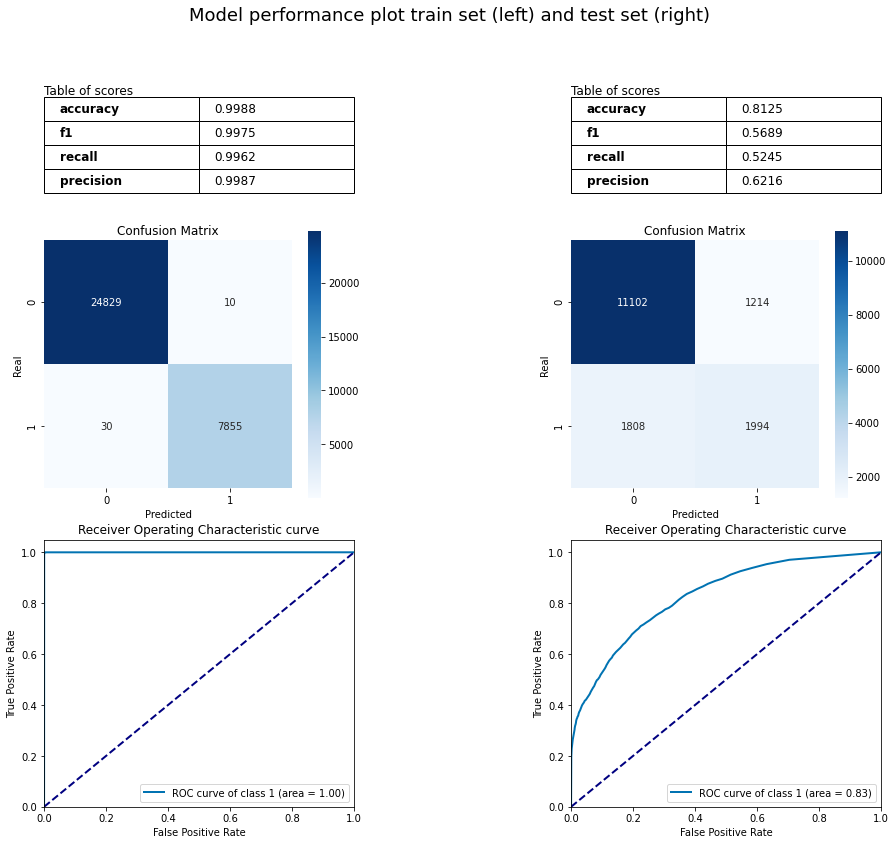

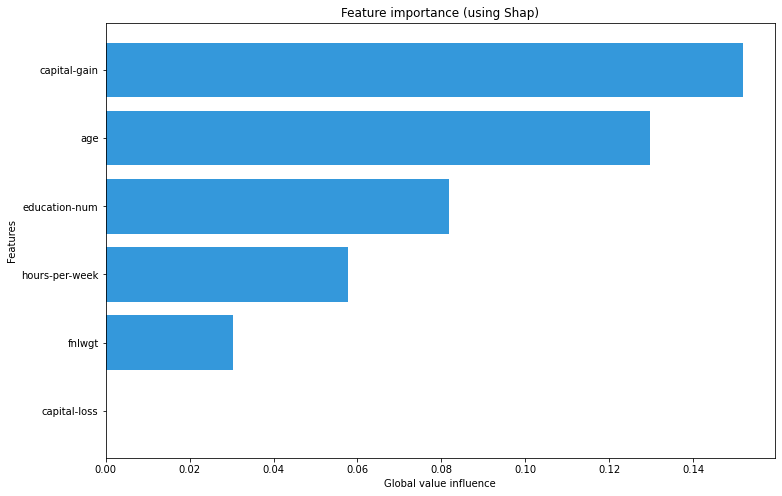

In [24]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from transparentai import utils

def generate_validation_report(model, X, y_true, X_valid=None, y_true_valid=None, 
                               metrics=None, model_type='classification', out='report.pdf'):
    """
    """

    if utils.object_has_function(model, 'predict_proba'):
        fn = model.predict_proba
    else:
        fn = model.predict
        
    y_pred = fn(X)
    if X_valid is not None:
        y_pred_valid = fn(X_valid)
    else:
        y_pred_valid = None
        
    # TODO : generate header of report
    
    figs = list()
    
    # Plot y_true variable
    print('Generating y_true distribution')
    f = variable.plot_variable(y_true, plot=False)
    figs.append(f)
    
    if model_type == 'classification':
        module = classification
    else:
        module = regression
    
    print('Generating model performance')
    f = module.plot_performance(y_true, y_pred, y_true_valid, y_pred_valid, plot=False)
    figs.append(f)
    

    print('Generating model feature influence')
    explainer = explainers.ModelExplainer(model, X)
    f = explainer.plot_global_explain(X=X, nsamples=10, plot=False)
    figs.append(f)
    
    
    # TODO : generate footer of report
    
    pp = PdfPages(out)
    for f in figs:
        pp.savefig(f)
    pp.close()
    
    
    
generate_validation_report(clf, X_train, y_true, X_valid, y_true_valid)

In [11]:
explainers.ModelExplainer.plot_global_explain

<function transparentai.models.explainers.model_explainer.ModelExplainer.plot_global_explain(self, X=None, nsamples=None, top=None, color='#3498db', **kwargs)>